### Assignment 3 - ES60011
Name: Bannuru Rohit Kumar Reddy\
Roll No: 21CS30011

Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# import accuracy_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Import the polynomial features
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss

# Import standard scaler
from sklearn.preprocessing import StandardScaler

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

### EDA
Loading data and printing basic information

In [3]:
data = pd.read_csv('Breast_Cancer.csv')
print(data.tail())
print(data.info())

print(data['Status'].value_counts())    

      Age   Race Marital Status T Stage  N Stage 6th Stage  \
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
4019            Positive                       1                      1   
40

Encoding the target variable

In [4]:
# Convert the Status column to binary
data['Status'] = data['Status'].map({'Dead':0, 'Alive':1})

print(data.tail())

      Age   Race Marital Status T Stage  N Stage 6th Stage  \
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
4019            Positive                       1                      1   
40

Finding the categorical and numercial columns \
Finding the number of categories in each categorical columns \
Enoding the categorical columns for future purposes when training the model

In [5]:
# Finding the categorical columns
categorical = [var for var in data.columns if data[var].dtype=='O']
numerical = [var for var in data.columns if data[var].dtype!='O']

# For each categorical column print the number of unique values
for col in categorical:
    print(data[col].value_counts())
    
# Convert the categorical columns to numerical using label encoding
for col in categorical:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

White    3413
Other     320
Black     291
Name: Race, dtype: int64
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: Marital Status, dtype: int64
T2    1786
T1    1603
T3     533
T4     102
Name: T Stage , dtype: int64
N1    2732
N2     820
N3     472
Name: N Stage, dtype: int64
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: 6th Stage, dtype: int64
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: differentiate, dtype: int64
2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: Grade, dtype: int64
Regional    3932
Distant       92
Name: A Stage, dtype: int64
Positive    3755
Negative     269
Name: Estrogen Status, dtype: int64
Positive    3326
Negative     698
Name: Progesterone Status, dtype: int64



Analyzing the numerical columns

In [6]:
print(numerical)

['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']


Plotting the graphs of the numerical columns

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tumor Size'}>,
        <AxesSubplot:title={'center':'Regional Node Examined'}>,
        <AxesSubplot:title={'center':'Reginol Node Positive'}>],
       [<AxesSubplot:title={'center':'Survival Months'}>,
        <AxesSubplot:title={'center':'Status'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

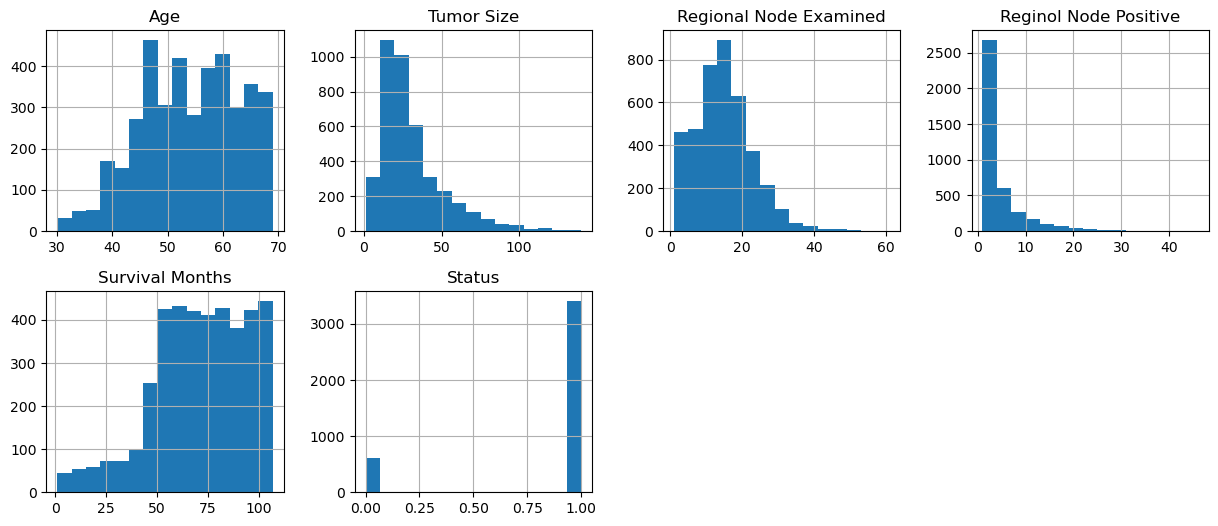

In [7]:
# Plotting the distribution of the numercal columns
data[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4))

In [8]:
# Finding the correltion between each numercial column and the target column Status
correlation = data.corr()
print(correlation['Status'].sort_values(ascending=False))

Status                    1.000000
Survival Months           0.476514
Estrogen Status           0.184650
Progesterone Status       0.177079
A Stage                   0.096584
Race                      0.050040
differentiate             0.018513
Marital Status           -0.033289
Regional Node Examined   -0.034772
Age                      -0.055921
Grade                    -0.134170
Tumor Size               -0.134205
T Stage                  -0.154699
N Stage                  -0.255772
Reginol Node Positive    -0.256638
6th Stage                -0.257636
Name: Status, dtype: float64


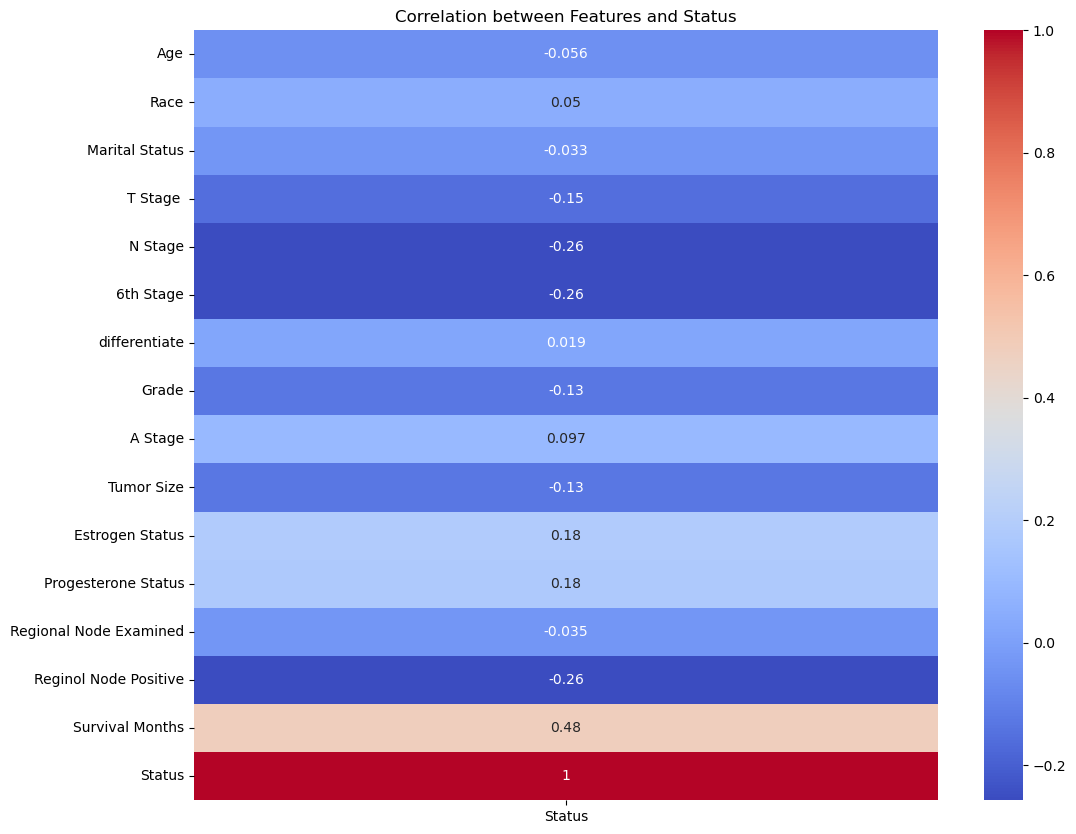

In [9]:
# Printing the correlation graph between each of the numerical column and the target column Status
# Plot the correlation between each feature and the 'Optionprice' feature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation[['Status']], annot=True, cmap='coolwarm')
plt.title('Correlation between Features and Status')
plt.show()

### Building decision tree from Scratch

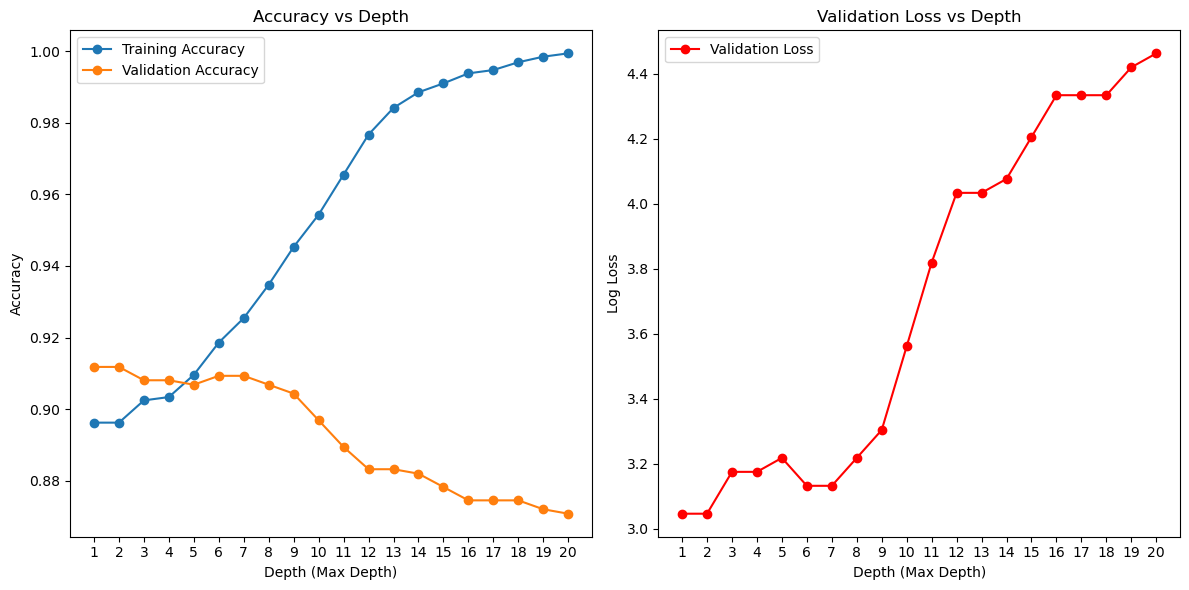

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature         # Index of the feature to split on
        self.threshold = threshold     # Value to split on
        self.left = left               # Left subtree
        self.right = right             # Right subtree
        self.value = value             # Class label (for leaf nodes)

class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        self.root = self._build_tree(X, y, depth=0)

    def _gini(self, y):
        classes, counts = np.unique(y, return_counts=True)
        impurity = 1 - sum((count / len(y)) ** 2 for count in counts)
        return impurity

    def _best_split(self, X, y):
        best_gini = float('inf')
        best_feature = None
        best_threshold = None
        best_left_indices = None
        best_right_indices = None
        
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature] <= threshold)[0]
                right_indices = np.where(X[:, feature] > threshold)[0]

                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                gini = (len(left_indices) * self._gini(y[left_indices]) +
                        len(right_indices) * self._gini(y[right_indices])) / len(y)

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold
                    best_left_indices = left_indices
                    best_right_indices = right_indices

        return best_feature, best_threshold, best_left_indices, best_right_indices

    def _build_tree(self, X, y, depth):
        if len(set(y)) == 1 or (self.max_depth is not None and depth >= self.max_depth):
            return DecisionTreeNode(value=np.bincount(y).argmax())

        feature, threshold, left_indices, right_indices = self._best_split(X, y)

        if feature is None:
            return DecisionTreeNode(value=np.bincount(y).argmax())

        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        
        return DecisionTreeNode(feature, threshold, left_subtree, right_subtree)

    def _predict_one(self, node, x):
        if node.value is not None:  # Leaf node
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict_one(node.left, x)
        else:
            return self._predict_one(node.right, x)

    def predict(self, X):
        return np.array([self._predict_one(self.root, x) for x in X])

    def _predict_proba_one(self, node, x):
        if node.value is not None:  # Leaf node
            proba = np.zeros(len(np.unique(y)))  # Create probability array
            proba[node.value] = 1  # Assign 100% probability to the class label
            return proba
        if x[node.feature] <= node.threshold:
            return self._predict_proba_one(node.left, x)
        else:
            return self._predict_proba_one(node.right, x)

    def predict_proba(self, X):
        return np.array([self._predict_proba_one(self.root, x) for x in X])

# Assuming `data` is your DataFrame and 'Status' is the target column
X = data.drop('Status', axis=1).to_numpy()
y = data['Status'].to_numpy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store metrics
depths = range(1, 21)
train_accuracies = []
validation_accuracies = []
validation_losses = []

# Train model with varying max_depth (as epochs)
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)

    # Predict on training and testing data
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    validation_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate log loss (validation loss)
    validation_loss = log_loss(y_test, tree.predict_proba(X_test))

    train_accuracies.append(train_accuracy)
    validation_accuracies.append(validation_accuracy)
    validation_losses.append(validation_loss)

# Plotting
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, validation_accuracies, label='Validation Accuracy', marker='o')
plt.title('Accuracy vs Depth')
plt.xlabel('Depth (Max Depth)')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(depths, validation_losses, label='Validation Loss', marker='o', color='red')
plt.title('Validation Loss vs Depth')
plt.xlabel('Depth (Max Depth)')
plt.ylabel('Log Loss')
plt.xticks(depths)
plt.legend()

plt.tight_layout()
plt.show()


We can clearly see that as the number of epochs increase the training accuracy increases because of overfitting on the trianing data and the test accuracy decreases \
The best validaion/test accuracy is obtained with a optimal depth of 5 with our custom model

### Finding accuracy of the trained model with the best epoch found 

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the model with max_depth of 5
best_depth = 5
final_tree = DecisionTreeClassifier(max_depth=best_depth)
final_tree.fit(X_train, y_train)

# Make predictions on the training and testing datasets
y_train_pred = final_tree.predict(X_train)
y_test_pred = final_tree.predict(X_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
validation_accuracy = accuracy_score(y_test, y_test_pred)
validation_loss = log_loss(y_test, final_tree.predict_proba(X_test))

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {validation_accuracy:.4f}")
print(f"Validation Log Loss: {validation_loss:.4f}")

# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.9096
Validation Accuracy: 0.9068
Validation Log Loss: 3.2179

Confusion Matrix:
[[ 59  61]
 [ 14 671]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.49      0.61       120
           1       0.92      0.98      0.95       685

    accuracy                           0.91       805
   macro avg       0.86      0.74      0.78       805
weighted avg       0.90      0.91      0.90       805



#### Testing the accuracy with an inbuild decision tree classfier

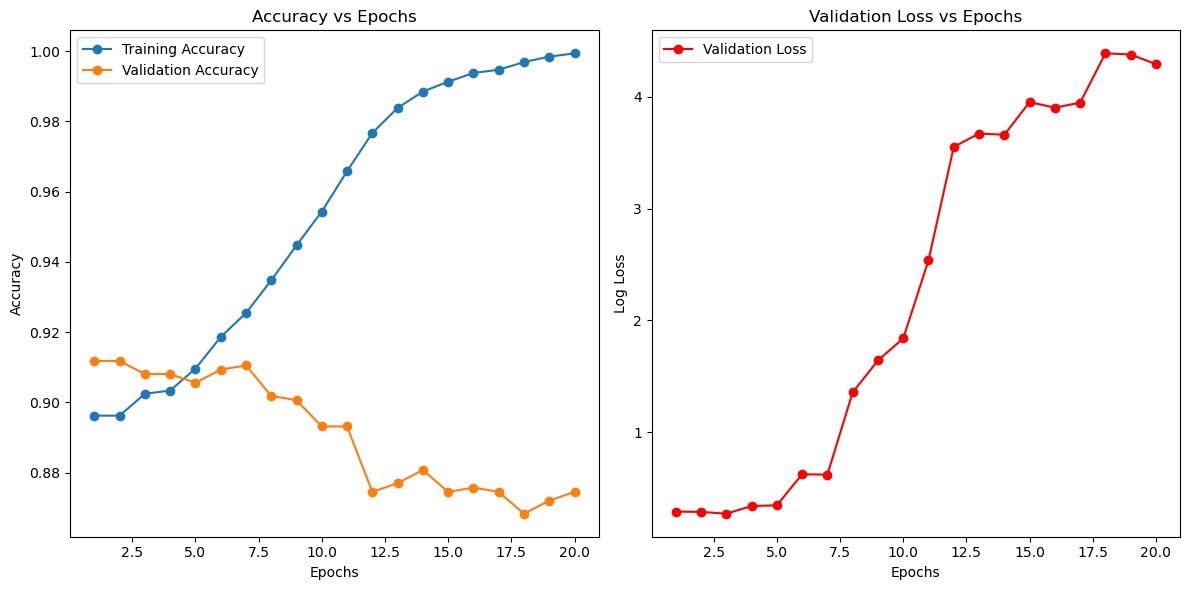

In [12]:
# Define features and target
X = data.drop('Status', axis=1)
y = data['Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier
epochs = range(1, 21)
train_accuracies = []
validation_accuracies = []
validation_losses = []

# Train model with varying epochs
for epoch in epochs:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=epoch)
    clf.fit(X_train, y_train)
    
    # Predict on training and testing data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    validation_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Calculate log loss (validation loss)
    validation_loss = log_loss(y_test, clf.predict_proba(X_test))
    
    train_accuracies.append(train_accuracy)
    validation_accuracies.append(validation_accuracy)
    validation_losses.append(validation_loss)

# Plotting
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracies, label='Validation Accuracy', marker='o')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, validation_losses, label='Validation Loss', marker='o', color='red')
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### Training the inbuilt model with best epoch to get best accuracy for the test data

In [13]:
# Training with 3 epochs
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf.fit(X_train, y_train)

# Predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.9024541783162473
Testing Accuracy: 0.9080745341614906
